In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'C:/Users/khoat/OneDrive - National Economics University/Desktop/1. Study/3.1. Data Preparation & Visualiazation/data/'

In [3]:
car = pd.read_csv(path + 'CarPrice_Assignment.csv')

In [4]:
car.doornumber.replace('two', 2, inplace=True)
car.doornumber.replace('four', 4, inplace=True)

In [5]:
car.cylindernumber.replace('two', 2, inplace=True)
car.cylindernumber.replace('four', 4, inplace=True)
car.cylindernumber.replace('five', 5, inplace=True)
car.cylindernumber.replace('six', 6, inplace=True)

In [6]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
car.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [8]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<AxesSubplot:>

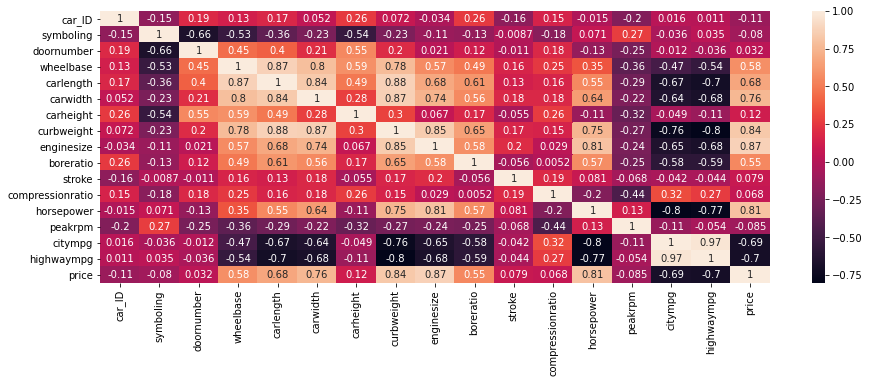

In [9]:
plt.figure(figsize=(15,5))
sns.heatmap(car.corr(),annot=True)

C:\Users\khoat\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


car_ID                  AxesSubplot(0.125,0.71587;0.133621x0.16413)
symboling            AxesSubplot(0.285345,0.71587;0.133621x0.16413)
doornumber            AxesSubplot(0.44569,0.71587;0.133621x0.16413)
wheelbase            AxesSubplot(0.606034,0.71587;0.133621x0.16413)
carlength            AxesSubplot(0.766379,0.71587;0.133621x0.16413)
carwidth               AxesSubplot(0.125,0.518913;0.133621x0.16413)
carheight           AxesSubplot(0.285345,0.518913;0.133621x0.16413)
curbweight           AxesSubplot(0.44569,0.518913;0.133621x0.16413)
enginesize          AxesSubplot(0.606034,0.518913;0.133621x0.16413)
boreratio           AxesSubplot(0.766379,0.518913;0.133621x0.16413)
stroke                 AxesSubplot(0.125,0.321957;0.133621x0.16413)
compressionratio    AxesSubplot(0.285345,0.321957;0.133621x0.16413)
horsepower           AxesSubplot(0.44569,0.321957;0.133621x0.16413)
peakrpm             AxesSubplot(0.606034,0.321957;0.133621x0.16413)
citympg             AxesSubplot(0.766379,0.32195

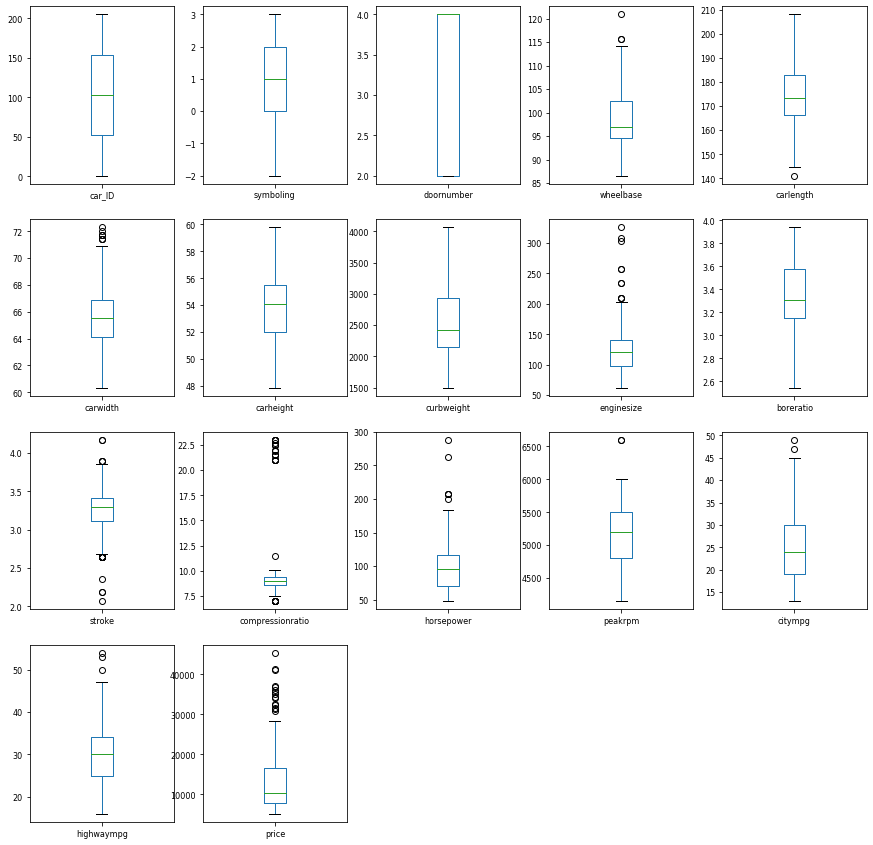

In [10]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
car.plot(kind='box', subplots=True, layout=(4,5), sharex=False, sharey=False, fontsize=8, ax=ax)

In [11]:
car = car[car['carwidth'] < 71]
car = car[car['enginesize'] < 220]
car = car[car['stroke'] < 4]
car = car[car['stroke'] > 2.5]
car = car[car['compressionratio'] < 11]
car = car[car['horsepower'] < 200]
car = car[car['peakrpm'] < 6500]
car = car[car['citympg'] < 45]
car = car[car['highwaympg'] < 49]

In [12]:
x = car.drop(['car_ID', 'symboling','CarName','fueltype','aspiration', 'stroke','carbody','drivewheel','enginelocation','enginetype','fuelsystem', 'compressionratio', 'peakrpm', 'price'], axis=1)
y = car['price']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=11)

# Linear Regression

In [15]:
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=np.linspace(0.1, 2, 10))
reg.fit(x_train,y_train)
reg.coef_

array([-223.99264946,   54.18558788,   44.61946611,   25.84362289,
         44.71172775,    1.79801706,  745.1640465 ,   -8.63151983,
        482.86946508,   88.48862018, -295.22323408,  236.38717547])

In [16]:
train_pred = reg.predict(x_train)
test_pred = reg.predict(x_test)

In [17]:
from sklearn import metrics
print('Train set:')
print('MAE:', metrics.mean_absolute_error(y_train, train_pred))
print('MSE:', metrics.mean_squared_error(y_train, train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
print('R^2:', metrics.r2_score(y_train, train_pred))

Train set:
MAE: 1719.622713222071
MSE: 7362953.913698537
RMSE: 2713.4763521539185
R^2: 0.7148812849433439


In [18]:
print('Test set:')
print('MAE:', metrics.mean_absolute_error(y_test, test_pred))
print('MSE:', metrics.mean_squared_error(y_test, test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
print('R^2:', metrics.r2_score(y_test, test_pred))

Test set:
MAE: 2394.684383245339
MSE: 13336880.120082581
RMSE: 3651.9693481849736
R^2: 0.7055120510749557


In [19]:
print('MSE:', metrics.r2_score(y_test, test_pred))

MSE: 0.7055120510749557


# KNN

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [43]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [44]:
train_pred = neigh.predict(x_train)
test_pred = neigh.predict(x_test)

In [45]:
print('Train set:')
print('MAE:', metrics.mean_absolute_error(y_train, train_pred))
print('MSE:', metrics.mean_squared_error(y_train, train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
print('R^2:', metrics.r2_score(y_train, train_pred))

Train set:
MAE: 1621.2775209302326
MSE: 8741424.59010484
RMSE: 2956.5900273972447
R^2: 0.6615021938058822


In [46]:
print('Test set:')
print('MAE:', metrics.mean_absolute_error(y_test, test_pred))
print('MSE:', metrics.mean_squared_error(y_test, test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
print('R^2:', metrics.r2_score(y_test, test_pred))

Test set:
MAE: 8618.163636363635
MSE: 96910254.67030303
RMSE: 9844.300618647474
R^2: -1.1398484406174987


# SVR

In [47]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':['linear', 'rbf'], 'C':[1, 10]}
svr = svm.SVR()
clf = GridSearchCV(svr, param_grid=parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf']})

In [48]:
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [49]:
train_pred = clf.predict(x_train)
test_pred = clf.predict(x_test)

In [50]:
print('Train set:')
print('MAE:', metrics.mean_absolute_error(y_train, train_pred))
print('MSE:', metrics.mean_squared_error(y_train, train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
print('R^2:', metrics.r2_score(y_train, train_pred))

Train set:
MAE: 1822.549658026857
MSE: 11921685.760313159
RMSE: 3452.7794253779316
R^2: 0.5383516228499251


In [51]:
print('Test set:')
print('MAE:', metrics.mean_absolute_error(y_test, test_pred))
print('MSE:', metrics.mean_squared_error(y_test, test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
print('R^2:', metrics.r2_score(y_test, test_pred))

Test set:
MAE: 1146522.549769366
MSE: 1349052880233.141
RMSE: 1161487.3568976724
R^2: -29787.06228400148
